In [245]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape, add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import regularizers
from skimage.util import random_noise
import cv2
import keras
import os
from wand.image import Image
import pickle
from keras.models import model_from_json
import pydot
import random

In [246]:
json_file = open(r'C:\Users\Pratham Agarwal\Desktop\Major Project\V3\smudge_autoencoderV4.json', 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'C:\Users\Pratham Agarwal\Desktop\Major Project\V3\smudge_autoencoder_weightsV4.h5')

In [570]:
PATH=r'C:\Users\Pratham Agarwal\Desktop\Major Project\Test Images'

In [571]:
directory=os.listdir(PATH)

In [605]:
img=cv2.imread("{}\{}".format(PATH,directory[8]),0)

In [606]:
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]], np.float32)
# kernel=(1/3)*kernel
img = cv2.filter2D(img, -1, kernel)

In [607]:
# alpha = 0.5 # Contrast control (1.0-3.0)
# beta = 0 # Brightness control (0-100)

# img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

In [608]:
img.shape

(1024, 768)

In [609]:
ox=img.shape[0]
oy=img.shape[1]

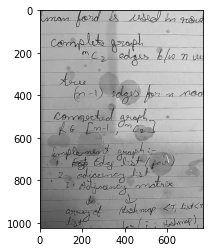

In [610]:
plt.imshow(img,cmap='gray')

In [611]:
img=np.array(img)
img.shape

(1024, 768)

In [612]:
x=int(img.shape[0]/256)+1
y=int(img.shape[1]/256)+1
x=x*256
y=y*256

In [613]:
x,y

(1280, 1024)

In [614]:
img=cv2.resize(img,(y,x))

In [615]:
img.shape

(1280, 1024)

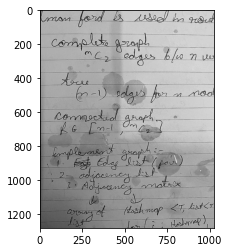

In [616]:
plt.imshow(img,cmap='gray')

In [617]:
imgNew=np.zeros((x,y))

In [618]:
imgNew.shape

(1280, 1024)

In [619]:
x1=0
y1=0
x2=256
y2=256
count=0
while y1<y:
    while x1<x:
        grid=img[x1:x2,y1:y2]
        grid=grid/255.0
        predGrid=json_model.predict(grid.reshape(1,256,256,1))
        predGrid=predGrid.reshape(256,256)
        predGrid=predGrid*255.0
        for i in range(x1,x2):
            for j in range(y1,y2):
                imgNew[i][j]=predGrid[i-x1][j-y1]
        x1=x1+256
        x2=x2+256
        count=count+1
    x1=0
    x2=256
    y1=y1+256
    y2=y2+256
print(count)

20


In [620]:
imgNew=cv2.resize(imgNew,(oy,ox))
imgNew.shape

(1024, 768)

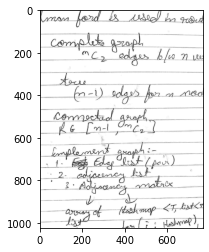

In [621]:
plt.imshow(imgNew,cmap='gray')

In [588]:
# kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]], np.float32)
# # kernel=(1/3)*kernel
# img = cv2.filter2D(imgNew, -1, kernel)

In [413]:
# plt.imshow(img,cmap='gray')